In [143]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import keras
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

In [41]:
x = np.arange(1, 71)

1275

In [88]:
df_w = pd.DataFrame(index=range((45+46)*14), columns = ['animal', 'gender', 'week', 'weight'])

In [89]:
temp_f = [185.34,
187.6,
196.35,
202.64,
183.67,
191.9,
188.6,
171.3,
184.05,
194.98,
196.83,
208.33,
188.22,
202.46,
189.81,
193.62,
195.02,
191.71,
187,
187.26,
186.1,
160.28,
175.57,
197.05,
182.74,
190.3,
180.08,
175.17,
177.49,
178.42,
161.55,
169.24,
178.41,
169.24,
173.41,
197.73,
193.14,
198.93,
189.35,
190.14,
212.24,
197.65,
173.21,
185.13,
182.52,
320.08,
275.01,
305.43,
299.46,
295.41,
293.53,
280.19,
269.19,
305.66,
261.62,
309.02,
314.12,
323.77,
308.39,
287.83,
260.75,
280.5,
270.76,
273.43,
277.71,
246.61,
299.27,
271.03,
272.48,
280.29,
259.37,
274.55,
337.02,
314.78,
329.91,
338.82,
239.58,
271.75,
295.11,
293.17,
299.15,
324.82,
285.76,
283.08,
298.42,
317.42,
309.9,
326.29,
316.38,
327.64,
258.31,
204.05,
207.47,
215.33,
218.51,
202.14,
220.01,
203.62,
192.36,
199.68,
207.8,
212.83,
220.65,
216.55,
206.71,
206.1,
216.17,
203.94,
209.78,
202.69,
199.77,
198.88,
195.09,
201.55,
219.24,
200.9,
201.62,
192.2,
194.12,
194.29,
198.41,
174.17,
186.14,
200.17,
184.56,
186.97,
216.45,
214.77,
221.81,
207.23,
212.05,
225.55,
213.37,
197.97,
199.54,
193.01,
348.57,
306.97,
337.33,
328.4,
325.87,
320.71,
318.92,
295.52,
311.63,
301.67,
342.57,
347.45,
358.47,
345.74,
321.23,
294.34,
314.5,
294.59,
310.16,
299.82,
277.99,
336.04,
297.89,
305.96,
321.07,
297.55,
307.69,
378.29,
352.3,
360.96,
375.22,
270.82,
308.31,
327.65,
341.15,
331.06,
328.45,
324.83,
317.31,
336.85,
351.56,
336.05,
359.06,
355.22,
366.46,
288.44,
215.26,
216.655,
229.665,
231.89,
216.265,
225.075,
216.56,
203.405,
215.605,
222.01,
227.84,
235.57,
225.63,
224.57,
219.315,
232.965,
221.445,
221.48,
213.785,
208.11,
204.46,
206.52,
215.85,
228.35,
212.065,
211.49,
201.375,
204.37,
207.385,
206.395,
184.78,
196.59,
214.58,
198.94,
198.165,
231.155,
227.69,
233.885,
220.035,
223.805,
239.41,
228.735,
215.88,
212.23,
205.24,
369.115,
329.355,
359.935,
353.12,
350.735,
343.345,
342.29,
316.04,
337.69,
330.575,
370,
379.08,
387.455,
371.185,
352.33,
320.135,
341.51,
315.19,
331.14,
323.1,
299.125,
360.74,
322.08,
334.515,
344.775,
325.77,
344.13,
404.915,
378.05,
380.93,
398.265,
296.16,
334.055,
346.26,
365.825,
354.555,
350.74,
337.44,
341.45,
368.935,
378.835,
359.51,
381.755,
381.54,
389.925,
309.525,
226.47,
225.84,
244,
245.27,
230.39,
230.14,
229.5,
214.45,
231.53,
236.22,
242.85,
250.49,
234.71,
242.43,
232.53,
249.76,
238.95,
233.18,
224.88,
216.45,
210.04,
217.95,
230.15,
237.46,
223.23,
221.36,
210.55,
214.62,
220.48,
214.38,
195.39,
207.04,
228.99,
213.32,
209.36,
245.86,
240.61,
245.96,
232.84,
235.56,
253.27,
244.1,
233.79,
224.92,
217.47,
389.66,
351.74,
382.54,
377.84,
375.6,
365.98,
365.66,
336.56,
363.75,
359.48,
397.43,
410.71,
416.44,
396.63,
383.43,
345.93,
368.52,
335.79,
352.12,
346.38,
320.26,
385.44,
346.27,
363.07,
368.48,
353.99,
380.57,
431.54,
403.8,
400.9,
421.31,
321.5,
359.8,
364.87,
390.5,
378.05,
373.03,
350.05,
365.59,
401.02,
406.11,
382.97,
404.45,
407.86,
413.39,
330.61,
235.875,
232.075,
244.75,
249.305,
231.255,
232.48,
231.65,
218.395,
237.795,
238.615,
246.43,
253.64,
235.17,
248.165,
231.435,
254.37,
237.835,
239.21,
226.21,
223.525,
214.335,
217.43,
226.65,
235.57,
224.61,
226.065,
213.815,
219.1,
229.01,
212.745,
202.335,
213.17,
234.6,
222.6,
212.445,
249.505,
248.895,
241.76,
239.82,
240.675,
257.625,
250.075,
247.555,
227.87,
220.815,
399.27,
364.19,
397.74,
382.12,
382.35,
376.96,
388.61,
354.26,
379.69,
377.15,
409.85,
421.06,
432.66,
415.38,
393.86,
357.57,
376.88,
335.86,
367.54,
366.53,
330.97,
408.09,
357.89,
382.24,
383.52,
369.68,
404.88,
448.09,
418,
414.74,
441.96,
334.99,
370.55,
383.48,
411.53,
392.46,
378.15,
356.74,
370.26,
411.25,
423.66,
391.94,
414.8,
430.79,
425.46,
338.88,
243.65,
242.84,
247.14,
253.02,
239.57,
238.23,
238.2,
220.99,
245.18,
233.25,
253.79,
263.18,
244.37,
257.19,
233.59,
263.16,
235.4,
249.1,
236.6,
232.75,
217.48,
210.88,
221.66,
236.44,
231.21,
230.93,
205.1,
223.05,
238.95,
215.02,
210.31,
221.87,
239.99,
233.01,
218.49,
247.56,
256.95,
254.63,
248.58,
251.69,
253.93,
256.39,
263.64,
233.94,
220.83,
415.85,
386.09,
416.46,
402.71,
403.88,
400.29,
414.52,
377.94,
402.21,
389.7,
414.46,
433.27,
448.16,
429.95,
412.47,
374.88,
394.94,
358.18,
385.52,
379.75,
346.37,
409.38,
385.72,
402.17,
390.98,
372.74,
417.46,
462.93,
439.15,
424.16,
437.37,
336.86,
385.96,
409.47,
408.76,
407.07,
392.34,
356.74,
386.35,
412.95,
446.39,
408.22,
433.63,
440.55,
439.67,
350.29,
251.12,
251.74,
256.19,
265.36,
244.33,
244.86,
241.5,
233.01,
256.01,
233.03,
257.28,
267.79,
249.88,
263.91,
228.76,
265.93,
244.79,
256.24,
221.33,
241.92,
233.13,
213.86,
226.21,
249.4,
231.43,
232.4,
220.07,
234.35,
251.82,
225.68,
219.93,
222.92,
245.73,
235.86,
220.96,
252.2,
268.66,
261.36,
254.07,
256.88,
261.45,
257.68,
263.07,
239.54,
216.75,
432.62,
394.51,
435.22,
416.94,
417.56,
398.89,
414.68,
392.52,
406.69,
393.73,
425.31,
443.16,
456.79,
447.84,
434.34,
384.9,
404.91,
383.73,
374.42,
396.07,
351.44,
407.75,
372.13,
402.31,
401.81,
393.5,
421.23,
468.28,
456.47,
426.02,
458.06,
352.2,
393.83,
411.9,
403.74,
418.01,
408.01,
386.14,
389.8,
429.79,
437.08,
429.04,
319.26,
451.73,
446.47,
372.69,
249.04,
251.1,
253.23,
275.24,
244.93,
246.42,
238.77,
224.17,
267.62,
240.18,
257.73,
281.2,
255.01,
280.5,
243.76,
278.38,
276.04,
259.81,
243.89,
254.18,
232.38,
219.26,
234.69,
258.99,
236.74,
240.57,
228.3,
245.2,
249.6,
233.95,
226.39,
234.4,
250.74,
245.53,
230.5,
251.76,
276.03,
267.67,
261.65,
262.53,
273.61,
269.18,
277.87,
246.64,
228.94,
437.94,
390.86,
446.27,
428.37,
423.31,
410.57,
424.33,
404.75,
414.08,
413.42,
432.42,
446.23,
469.97,
458.19,
442.57,
391.64,
411.55,
380.86,
398.47,
401.95,
401.95,
415.02,
402.18,
408.41,
410.73,
401.01,
427.3,
469.81,
453.89,
431.04,
465.64,
351.06,
403.24,
419.98,
416.95,
424.78,
410.44,
388.6,
402.41,
437.62,
450.43,
444.35,
462.09,
465.7,
454.87,
454.87,
261.4,
257.36,
261.65,
275.72,
261.94,
254.44,
252.53,
245.83,
279.32,
243.19,
276.52,
288.16,
260.37,
299.65,
259.85,
298.77,
263.39,
269.42,
258.83,
255.01,
234.08,
229.81,
243.72,
263.37,
243.01,
246.19,
240.21,
259.02,
265.79,
250.92,
234.67,
241.54,
268.31,
258.35,
238.89,
271.8,
278.6,
285.99,
266.79,
272.38,
281.76,
285.27,
295.75,
258.78,
258.33,
456.77,
400.73,
472.45,
449.58,
444.69,
430.06,
441.43,
424.59,
442.73,
442.56,
454.64,
470.21,
491.99,
480.59,
470.05,
418.48,
442.16,
401.44,
420.83,
414.06,
385.455,
437.27,
389.75,
424.31,
420.76,
426.39,
448.76,
490.12,
491.14,
461.27,
507.73,
369.62,
424.84,
439.2,
436.88,
447.41,
426.88,
416.57,
430.95,
450.67,
469.01,
465.53,
485.01,
484.23,
479.5,
424.64,
264.83,
264.78,
266.3,
284.06,
263.87,
260.7,
251.27,
249.98,
283,
255.45,
267.34,
289.76,
268.14,
304.25,
268.85,
307.9,
324.67,
282,
256.41,
254.19,
236.3,
229.23,
246.54,
295.11,
243.95,
248.72,
241.19,
260.6,
262.81,
252.87,
238.19,
238.01,
266.61,
247.92,
224.36,
270.26,
287,
292.48,
302.49,
276.66,
276.66,
291.71,
309.83,
261.53,
284.99,
466.44,
409.14,
483.76,
460.99,
450.34,
435.35,
443.02,
435.48,
437.54,
456.05,
459.44,
467.87,
498.01,
492.38,
473.68,
424.04,
449.95,
407.08,
426.07,
424.54,
379.65,
445.28,
429.35,
430.12,
427.05,
424.06,
453.9,
505.76,
494.87,
470.63,
518.64,
375.75,
425.65,
447.56,
446.97,
459.21,
437.68,
422.51,
439.41,
462.05,
478.17,
470.68,
505.35,
491.12,
479.91,
404.47,
267.34,
274.97,
281.27,
289.37,
266.23,
281.36,
267.59,
274.47,
290.98,
254.43,
277.37,
308.61,
285.2,
311.79,
293.37,
323.64,
299.31,
290.29,
262.45,
266.78,
251.61,
238.44,
267.04,
257.9,
248.09,
255.67,
258.77,
261.3,
289.5,
260.41,
247.62,
245.02,
273.94,
253.93,
259.26,
287.68,
314.28,
314.4,
285.92,
279.1,
320.11,
302.29,
317.43,
262.1,
262.1,
475.93,
415.23,
505.08,
474.11,
472.37,
472.37,
453.6,
440.88,
443.35,
475.95,
467.03,
495.33,
511.59,
509.49,
486.03,
438.59,
463.06,
417.16,
439.8,
431.95,
393.39,
454.51,
436.49,
450.68,
439.79,
436.33,
465.43,
509.77,
518.23,
493.57,
544.09,
386.54,
447.42,
463.43,
453.11,
468.28,
448.79,
435.49,
455.1,
479.85,
495.32,
486.64,
516.43,
502.37,
506.37,
418.49,
276.24,
279.96,
276.96,
287.97,
270.82,
287.85,
278.61,
274.99,
304.84,
273.9,
293.35,
307.8,
284.63,
312.16,
284.73,
320.52,
296.76,
288.26,
267.25,
258.72,
249,
243.88,
256.98,
np.nan,
249.74,
257.3,
263,
269.79,
317.01,
255.4,
254.6,
259.14,
277.92,
271.56,
252.14,
299.86,
338.25,
314.14,
288.67,
284.74,
308.92,
320.87,
325.39,
268.3,
296.86,
483.23,
416.5,
508.78,
484.88,
473.31,
459.27,
462.64,
454.26,
458.76,
482.34,
474.06,
500.17,
504.85,
505.55,
492.54,
452.29,
479.7,
432,
452.44,
439.59,
404.8,
470.53,
448.8,
457,
449.38,
437.96,
481.44,
532.29,
527.66,
509.73,
552.22,
395.77,
456.83,
478.83,
465.73,
480.55,
460.23,
446.63,
473.01,
486.59,
514.39,
490.65,
524.73,
511.31,
515.87,
431,
306.68,
302.92,
292.31,
301.67,
280.72,
330.38,
292.15,
315.51,
325.99,
326.81,
np.nan,
np.nan,
306.51,
334.71,
323.24,
np.nan,
290.4,
283.9,
259.35,
255.41,
248.11,
257.58,
264.51,
np.nan,
267.53,
266.97,
276.83,
285.81,
326.2,
254.42,
274.52,
274.28,
304.26,
280.9,
280.53,
np.nan,
np.nan,
332.99,
312.2,
306.59,
np.nan,
np.nan,
np.nan,
299.93,
330.9,
np.nan,
442.58,
np.nan,
np.nan,
np.nan,
np.nan,
482.1,
471.46,
478.27,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
477.05,
np.nan,
446.21,
466.59,
461.27,
424.37,
453.15,
469.05,
470.77,
459.54,
444.51,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
413.3,
np.nan,
np.nan,
482.32,
np.nan,
np.nan,
465.2,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
450.81,
np.nan,
331.1,
np.nan,
np.nan,
312.2,
np.nan,
309.8,
np.nan,
np.nan,
376.3,
np.nan,
np.nan,
363.3,
np.nan,
357.1,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
265,
297.8,
np.nan,
np.nan,
261.8,
298.7,
327.2,
np.nan,
np.nan,
298.2,
np.nan,
np.nan,
336.2,
np.nan,
np.nan,
np.nan,
np.nan,
369.3,
341.9,
361.1,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan,
np.nan
]

In [90]:
temp_week = [8]*(45+46)+ [10]*(45+46)+ [12]*(45+46) + [13]*(45+46)+ [16]*(45+46)+ [22]*(45+46)+ [23]*(45+46) + [24]*(45+46)+ [31]*(45+46)+ [34]*(45+46)+ [38]*(45+46)+ [43]*(45+46)+ [50]*(45+46)+ [70]*(45+46)
temp_g = (['female']*45 + ['male']*46)*14
animal = np.tile(np.arange(1, 92),14)


In [91]:
df_w['weight'] = pd.Series(temp_f, index=df_w.index)
df_w['week'] = pd.Series(temp_week, index=df_w.index)
df_w['gender'] = pd.Series(temp_g, index=df_w.index)
df_w['animal'] = pd.Series(animal, index=df_w.index)


In [156]:
df_w

,animal,gender,week,weight
0,1,female,8,185.34
1,2,female,8,187.60
2,3,female,8,196.35
3,4,female,8,202.64
4,5,female,8,183.67
...,...,...,...,...
1212,30,female,70,298.20
1215,33,female,70,336.20
1220,38,female,70,369.30
1221,39,female,70,341.90


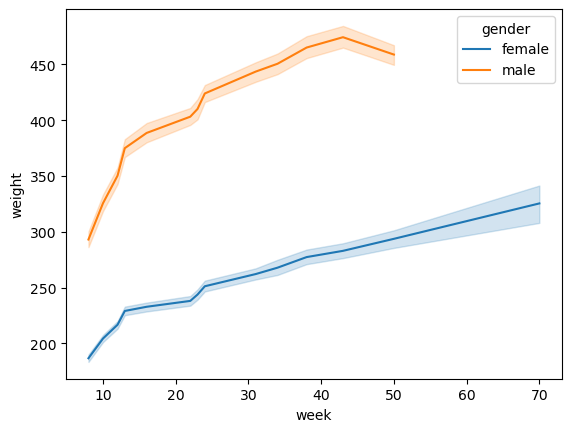

In [96]:
sns.lineplot(data=df_w, x=df_w['week'], y=df_w['weight'], hue= df_w['gender'])
plt.show()

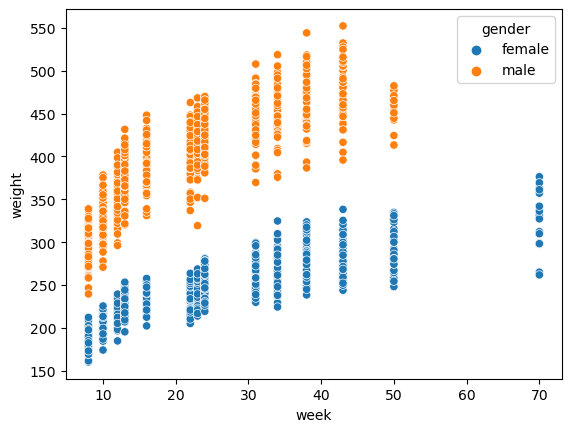

In [97]:
sns.scatterplot(data=df_w, x=df_w['week'], y=df_w['weight'], hue= df_w['gender'])
plt.show()

In [118]:
df_w.loc[df_w['gender'] == str("male")]['weight']
df_w = df_w.dropna()

In [135]:
x_data = df_w.loc[df_w['gender'] == str("male")]['week']
y_data = df_w.loc[df_w['gender'] == str("male")]['weight']

# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 2, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 70)                140       
_________________________________________________________________
dense_30 (Dense)             (None, 128)               9088      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 70)                9030      
Total params: 34,770
Trainable params: 34,770
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.fit( x_data, y_data, epochs=1000, verbose=1)

Epoch 1/1000
18/18 [==============================] - 0s 1000us/step - loss: 902.0864
Epoch 2/1000
18/18 [==============================] - 0s 944us/step - loss: 857.3916
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 865.7010
Epoch 4/1000
18/18 [==============================] - 0s 889us/step - loss: 877.3693
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 887.8289
Epoch 6/1000
18/18 [==============================] - 0s 944us/step - loss: 896.4406
Epoch 7/1000
18/18 [==============================] - 0s 944us/step - loss: 871.6506
Epoch 8/1000
18/18 [==============================] - 0s 1000us/step - loss: 901.4901
Epoch 9/1000
18/18 [==============================] - 0s 1ms/step - loss: 871.4918
Epoch 10/1000
18/18 [==============================] - 0s 945us/step - loss: 847.1161
Epoch 11/1000
18/18 [==============================] - 0s 1ms/step - loss: 889.2993
Epoch 12/1000
18/18 [==============================] - 0s 889us/step 

18/18 [==============================] - 0s 1ms/step - loss: 870.0782
Epoch 98/1000
18/18 [==============================] - 0s 944us/step - loss: 909.8937
Epoch 99/1000
18/18 [==============================] - 0s 1ms/step - loss: 923.6469
Epoch 100/1000
18/18 [==============================] - 0s 1ms/step - loss: 910.2064
Epoch 101/1000
18/18 [==============================] - 0s 1000us/step - loss: 1125.8165
Epoch 102/1000
18/18 [==============================] - 0s 954us/step - loss: 965.1605
Epoch 103/1000
18/18 [==============================] - 0s 945us/step - loss: 889.3060
Epoch 104/1000
18/18 [==============================] - 0s 889us/step - loss: 864.8073
Epoch 105/1000
18/18 [==============================] - 0s 945us/step - loss: 853.6517
Epoch 106/1000
18/18 [==============================] - 0s 945us/step - loss: 869.5310
Epoch 107/1000
18/18 [==============================] - 0s 1ms/step - loss: 867.1843
Epoch 108/1000
18/18 [==============================] - 0s 944us/s

18/18 [==============================] - 0s 944us/step - loss: 910.3451
Epoch 192/1000
18/18 [==============================] - 0s 889us/step - loss: 979.2623
Epoch 193/1000
18/18 [==============================] - 0s 889us/step - loss: 924.5282
Epoch 194/1000
18/18 [==============================] - 0s 945us/step - loss: 885.4575
Epoch 195/1000
18/18 [==============================] - 0s 1000us/step - loss: 861.7032
Epoch 196/1000
18/18 [==============================] - 0s 945us/step - loss: 885.7042
Epoch 197/1000
18/18 [==============================] - 0s 1000us/step - loss: 864.1185
Epoch 198/1000
18/18 [==============================] - 0s 1ms/step - loss: 872.7868
Epoch 199/1000
18/18 [==============================] - 0s 1ms/step - loss: 970.0938
Epoch 200/1000
18/18 [==============================] - 0s 944us/step - loss: 910.5698
Epoch 201/1000
18/18 [==============================] - 0s 945us/step - loss: 903.1990
Epoch 202/1000
18/18 [==============================] - 0s 1

18/18 [==============================] - 0s 944us/step - loss: 872.1210
Epoch 286/1000
18/18 [==============================] - 0s 944us/step - loss: 901.3293
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 877.9196
Epoch 288/1000
18/18 [==============================] - 0s 1000us/step - loss: 908.4623
Epoch 289/1000
18/18 [==============================] - 0s 1ms/step - loss: 888.8579
Epoch 290/1000
18/18 [==============================] - 0s 944us/step - loss: 858.2753
Epoch 291/1000
18/18 [==============================] - 0s 944us/step - loss: 1019.2202
Epoch 292/1000
18/18 [==============================] - 0s 944us/step - loss: 855.0970
Epoch 293/1000
18/18 [==============================] - 0s 1000us/step - loss: 861.5936
Epoch 294/1000
18/18 [==============================] - 0s 944us/step - loss: 850.6641
Epoch 295/1000
18/18 [==============================] - 0s 944us/step - loss: 861.0635
Epoch 296/1000
18/18 [==============================] - 0s 

18/18 [==============================] - 0s 944us/step - loss: 850.7448
Epoch 380/1000
18/18 [==============================] - 0s 1ms/step - loss: 860.4594
Epoch 381/1000
18/18 [==============================] - 0s 944us/step - loss: 858.3527
Epoch 382/1000
18/18 [==============================] - 0s 944us/step - loss: 885.9691
Epoch 383/1000
18/18 [==============================] - 0s 1000us/step - loss: 871.3384
Epoch 384/1000
18/18 [==============================] - 0s 1ms/step - loss: 893.1254
Epoch 385/1000
18/18 [==============================] - 0s 944us/step - loss: 929.3026
Epoch 386/1000
18/18 [==============================] - 0s 888us/step - loss: 934.7749
Epoch 387/1000
18/18 [==============================] - 0s 889us/step - loss: 901.7671
Epoch 388/1000
18/18 [==============================] - 0s 1ms/step - loss: 849.2808
Epoch 389/1000
18/18 [==============================] - 0s 999us/step - loss: 922.7931
Epoch 390/1000
18/18 [==============================] - 0s 945u

18/18 [==============================] - 0s 889us/step - loss: 895.4448
Epoch 475/1000
18/18 [==============================] - 0s 889us/step - loss: 849.8344
Epoch 476/1000
18/18 [==============================] - 0s 1000us/step - loss: 910.4464
Epoch 477/1000
18/18 [==============================] - 0s 945us/step - loss: 861.2646
Epoch 478/1000
18/18 [==============================] - 0s 1000us/step - loss: 862.9234
Epoch 479/1000
18/18 [==============================] - 0s 1ms/step - loss: 868.4512
Epoch 480/1000
18/18 [==============================] - 0s 1000us/step - loss: 966.1033
Epoch 481/1000
18/18 [==============================] - 0s 1ms/step - loss: 911.3975
Epoch 482/1000
18/18 [==============================] - 0s 1ms/step - loss: 870.5918
Epoch 483/1000
18/18 [==============================] - 0s 1000us/step - loss: 888.4593
Epoch 484/1000
18/18 [==============================] - 0s 945us/step - loss: 844.4857
Epoch 485/1000
18/18 [==============================] - 0s 9

18/18 [==============================] - 0s 945us/step - loss: 873.6638
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 872.1011
Epoch 570/1000
18/18 [==============================] - 0s 1000us/step - loss: 916.6078
Epoch 571/1000
18/18 [==============================] - 0s 946us/step - loss: 949.2615
Epoch 572/1000
18/18 [==============================] - 0s 945us/step - loss: 882.7838
Epoch 573/1000
18/18 [==============================] - 0s 944us/step - loss: 884.5322
Epoch 574/1000
18/18 [==============================] - 0s 1000us/step - loss: 857.8188
Epoch 575/1000
18/18 [==============================] - 0s 1ms/step - loss: 904.5583
Epoch 576/1000
18/18 [==============================] - 0s 1ms/step - loss: 863.3740
Epoch 577/1000
18/18 [==============================] - 0s 1000us/step - loss: 858.4085
Epoch 578/1000
18/18 [==============================] - 0s 1ms/step - loss: 857.1619
Epoch 579/1000
18/18 [==============================] - 0s 1000

18/18 [==============================] - 0s 1ms/step - loss: 868.8515
Epoch 664/1000
18/18 [==============================] - 0s 1000us/step - loss: 851.9656
Epoch 665/1000
18/18 [==============================] - 0s 1000us/step - loss: 854.4140
Epoch 666/1000
18/18 [==============================] - 0s 944us/step - loss: 918.9586
Epoch 667/1000
18/18 [==============================] - 0s 1000us/step - loss: 942.6176
Epoch 668/1000
18/18 [==============================] - 0s 944us/step - loss: 887.1249
Epoch 669/1000
18/18 [==============================] - 0s 1ms/step - loss: 861.0552
Epoch 670/1000
18/18 [==============================] - 0s 944us/step - loss: 850.0082
Epoch 671/1000
18/18 [==============================] - 0s 1ms/step - loss: 871.0969
Epoch 672/1000
18/18 [==============================] - 0s 1000us/step - loss: 911.3464
Epoch 673/1000
18/18 [==============================] - 0s 1ms/step - loss: 897.4108
Epoch 674/1000
18/18 [==============================] - 0s 1ms

18/18 [==============================] - 0s 889us/step - loss: 886.0997
Epoch 759/1000
18/18 [==============================] - 0s 1ms/step - loss: 864.5892
Epoch 760/1000
18/18 [==============================] - 0s 1000us/step - loss: 907.2585
Epoch 761/1000
18/18 [==============================] - 0s 944us/step - loss: 859.4771
Epoch 762/1000
18/18 [==============================] - 0s 1ms/step - loss: 864.4965
Epoch 763/1000
18/18 [==============================] - 0s 1ms/step - loss: 877.2170
Epoch 764/1000
18/18 [==============================] - 0s 1ms/step - loss: 894.4186
Epoch 765/1000
18/18 [==============================] - 0s 1000us/step - loss: 852.3850
Epoch 766/1000
18/18 [==============================] - 0s 1ms/step - loss: 897.0317
Epoch 767/1000
18/18 [==============================] - 0s 1ms/step - loss: 846.8531
Epoch 768/1000
18/18 [==============================] - 0s 1ms/step - loss: 853.6771
Epoch 769/1000
18/18 [==============================] - 0s 1ms/step - 

18/18 [==============================] - 0s 1ms/step - loss: 846.1619
Epoch 854/1000
18/18 [==============================] - 0s 1000us/step - loss: 879.7073
Epoch 855/1000
18/18 [==============================] - 0s 944us/step - loss: 884.5173
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 891.3561
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 846.4075
Epoch 858/1000
18/18 [==============================] - 0s 1ms/step - loss: 862.7496
Epoch 859/1000
18/18 [==============================] - 0s 1000us/step - loss: 904.5194
Epoch 860/1000
18/18 [==============================] - 0s 1ms/step - loss: 866.6744
Epoch 861/1000
18/18 [==============================] - 0s 944us/step - loss: 846.0216
Epoch 862/1000
18/18 [==============================] - 0s 997us/step - loss: 859.6414
Epoch 863/1000
18/18 [==============================] - 0s 1ms/step - loss: 876.7038
Epoch 864/1000
18/18 [==============================] - 0s 944us/ste

18/18 [==============================] - 0s 889us/step - loss: 884.4856
Epoch 949/1000
18/18 [==============================] - 0s 1000us/step - loss: 957.8224
Epoch 950/1000
18/18 [==============================] - 0s 1ms/step - loss: 875.7382
Epoch 951/1000
18/18 [==============================] - 0s 1000us/step - loss: 908.9555
Epoch 952/1000
18/18 [==============================] - 0s 833us/step - loss: 924.7617
Epoch 953/1000
18/18 [==============================] - 0s 1ms/step - loss: 896.7985
Epoch 954/1000
18/18 [==============================] - 0s 944us/step - loss: 904.7468
Epoch 955/1000
18/18 [==============================] - 0s 1ms/step - loss: 889.8036
Epoch 956/1000
18/18 [==============================] - 0s 889us/step - loss: 907.1229
Epoch 957/1000
18/18 [==============================] - 0s 944us/step - loss: 875.7674
Epoch 958/1000
18/18 [==============================] - 0s 944us/step - loss: 854.5287
Epoch 959/1000
18/18 [==============================] - 0s 944

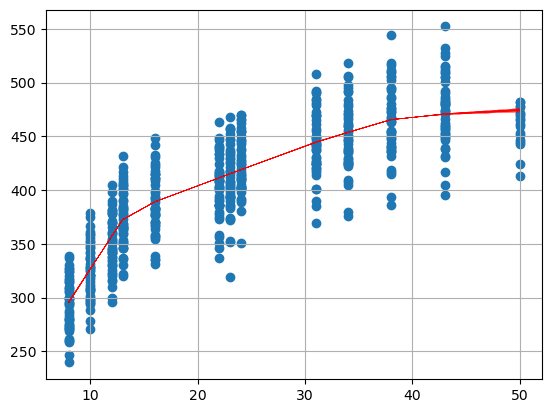

In [153]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=0.1)
plt.grid()
plt.show()

In [144]:
def wistar_w(g, h, x, y):
    # https://animal.ncku.edu.tw/p/412-1130-16363.php?Lang=en
    def fsigmoid(x, a, b):
        return  a + b * np.log(x)
    ress = np.nan

    _x = math.ceil(((21 * 24) + h) / (24 * 7))

    if g == str("male"):
        popt, pcov = curve_fit(fsigmoid, x, y)
        a, b = popt
        ress = a + b * np.log(_x)
    elif g == str("female"):
        popt, pcov = curve_fit(fsigmoid, x, y)
        a, b = popt
        ress = a + b * np.log(_x)
    else:
        print("You fucked up the gender on weight optimizer.")
    #print(_x)
    return ress

Parameters [150.39104411  18.9920955  401.53086842]
RMSE: 60.95074188119989
R-squared: 0.011874980808887825


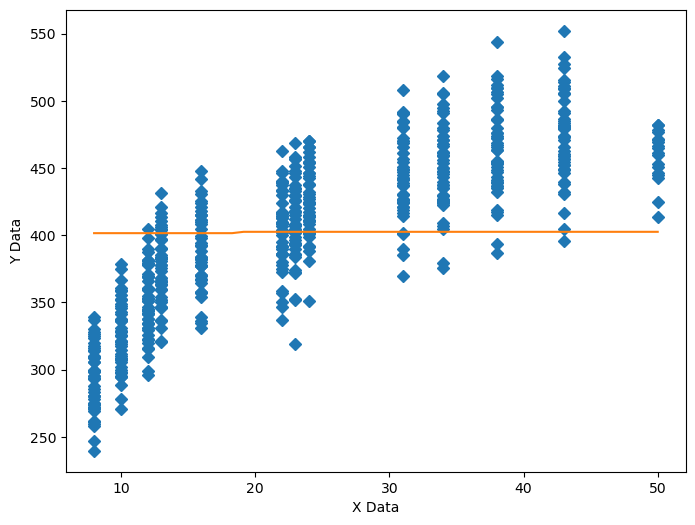

In [155]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = df_w.loc[df_w['gender'] == str("male")]['week']
yData = df_w.loc[df_w['gender'] == str("male")]['weight']

def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1.0 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)